In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams.update({"font.size":15})

# Linear Interpolation

- unstructured data (scattered points)
- grided data (regular grids)

Here we will talk about grided data (case 2).


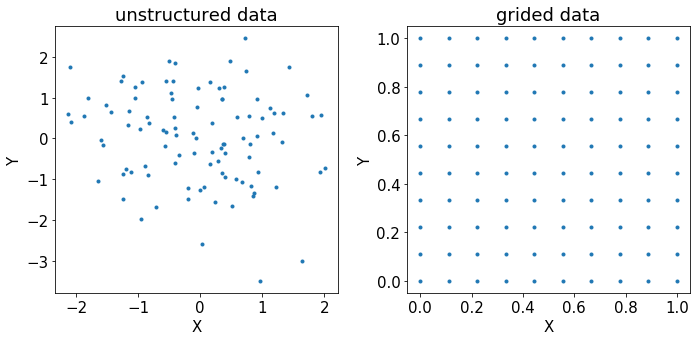

In [3]:
fig = figure(figsize=(10,5))
ax = fig.add_subplot(121)
x = np.random.randn(100,)
y = np.random.randn(100,)
ax.plot(x, y, '.')
xlabel("X")
ylabel("Y")
title("unstructured data")

ax = fig.add_subplot(122)
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
mx, my = np.meshgrid(x, y)
ax.plot(mx.flatten(), my.flatten(), '.')
xlabel("X")
ylabel("Y")
title("grided data")
fig.tight_layout()


## 1D case

$v = \cfrac{x_1-x}{x_1-x_0} \times v_0 + \cfrac{x-x_0}{x_1-x_0} \times v_1$

Let:

$w_0 = \cfrac{x_{1}-x}{x_{1}-x_{0}}$,

$w_1 = \cfrac{x-x_{0}}{x_{1}-x_{0}}$,

$v = w_0 \times v_0 + w_1 \times v_1 = \sum_{i=0,1} w_i \times v_i$


Text(0.5,0,'X')

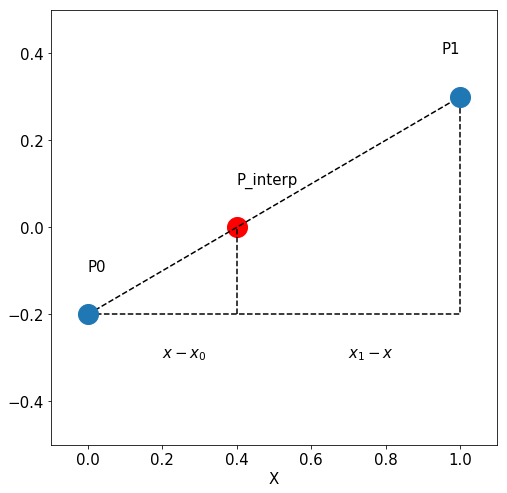

In [4]:
fig = figure(figsize=(8,8))
plot(0.4, 0, "ro", ms=20)
plot([0, 1], [-0.2,0.3], "k--")
plot([0, 1, 1], [-0.2,-0.2, 0.3], "k--")
plot([0.4, 0.4], [-0.2, 0], "k--")


plot([0, 1], [-0.2,0.3], "o",ms=20)
xlim((-0.1, 1.1))
ylim((-0.5, 0.5))

text(0.0, -0.1, "P0")
text(0.95, 0.4, "P1")
text(0.4, 0.1, "P_interp")

text(0.2, -0.3, "$x-x_0$")
text(0.7, -0.3, "$x_1-x$")

xlabel("X")

## 2D case

Let:

$w_{00} = \cfrac{x_{1}-x}{x_{1}-x_{0}} \times \cfrac{y_{1}-y}{y_{1}-y_{0}} $,

$w_{01} = \cfrac{x_{1}-x}{x_{1}-x_{0}} \times \cfrac{y-y_{0}}{y_{1}-y_{0}} $,

$w_{10} = \cfrac{x-x_{0}}{x_{1}-x_{0}} \times \cfrac{y_{1}-y}{y_{1}-y_{0}} $,

$w_{11} = \cfrac{x-x_{0}}{x_{1}-x_{0}} \times \cfrac{y-y_{0}}{y_{1}-y_{0}} $,

$v = \sum_{i,j=0,1} w_{ij} \times v_{ij}$

Text(0,0.5,'Y')

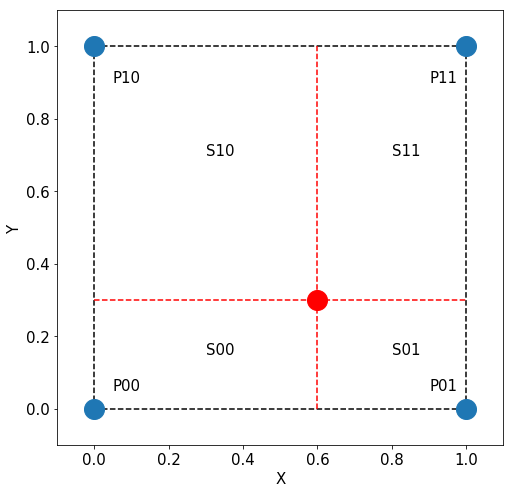

In [5]:
fig = figure(figsize=(8,8))
vlines([0, 1], 0, 1, colors="k", linestyles="--")
hlines([0, 1], 0, 1, colors="k", linestyles="--")

vlines(0.6, 0, 1, colors="r", linestyles="--")
hlines(0.3, 0, 1, colors="r", linestyles="--")

xlim((-0.1, 1.1))
ylim((-0.1, 1.1))
plot([0,0,1,1], [0,1,0,1], "o", ms=20)
plot(0.6, 0.3, "ro", ms=20)

text(0.3, 0.15, "S00")
text(0.8, 0.15, "S01")
text(0.3, 0.7, "S10")
text(0.8, 0.7, "S11")

text(0.05, 0.05, "P00")
text(0.9,  0.05, "P01")
text(0.05, 0.9, "P10")
text(0.9,  0.9, "P11")

xlabel("X")
ylabel("Y")

## ND case...... how to do it?

In [6]:
# a good tool!
from itertools import product
ndim = 3
codes = np.array([_ for _ in product((0, 1), repeat=ndim)])
print(codes)

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


# Example: Linear interpolation (grids) in 2D case
A comparison between 3 implementations:

- `regli.Regli`: [https://github.com/hypergravity/regli](https://github.com/hypergravity/regli)

- `scipy.interpolate.griddata`

- `scipy.interpolate.interpn`


In [7]:
# set grids
grid = np.arange(0.0, 2.0, 1.0)
values = np.array([0, 2, 1, 0]).reshape(-1, 1)

# set interp grids
grid_interp = np.arange(0.0, 1.1, 0.1)

# plot limits
_xlim = (-0.05, 1.05)

grid, grid_interp

(array([0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

### `regli.Regli`

In [8]:
from regli import Regli
# initiate Regli
r = Regli(grid, grid)
r_interp = Regli(grid_interp, grid_interp)

# set values (grided data)
r.set_values(values)

# interpolation
values_interp = r.interpns(r_interp.flats)

# reshape results
values_interp_2d = values_interp.reshape(len(grid_interp), -1)

In [9]:
r.flats

array([[0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.]])

### `scipy.interpolate.griddata`

In [10]:
from scipy.interpolate import griddata
values_interp_gd = griddata(
    r.flats, r.values, r_interp.flats, method="linear").reshape(*r_interp.grid_shape)

### `scipy.interpolate.RegularGridInterpolator`

In [11]:
from scipy.interpolate import RegularGridInterpolator
rgi = RegularGridInterpolator(r.grids, r.values.reshape(*r.grid_shape).T, method="linear")
values_interp_rgi = rgi(r_interp.flats).reshape(len(grid_interp), -1)

In [12]:
r.grids, r.values.reshape(*r.grid_shape)

((array([0., 1.]), array([0., 1.])), array([[0, 2],
        [1, 0]]))

Text(0,0.5,'Y')

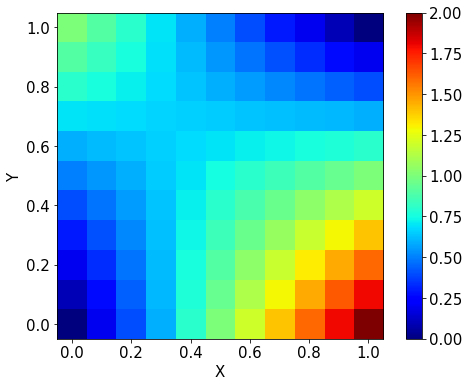

In [13]:
figure(figsize=(8,6))
imshow(values_interp_2d, origin="lower", cmap=cm.jet, extent=(*_xlim, *_xlim))
colorbar()
xlabel("X")
ylabel("Y")

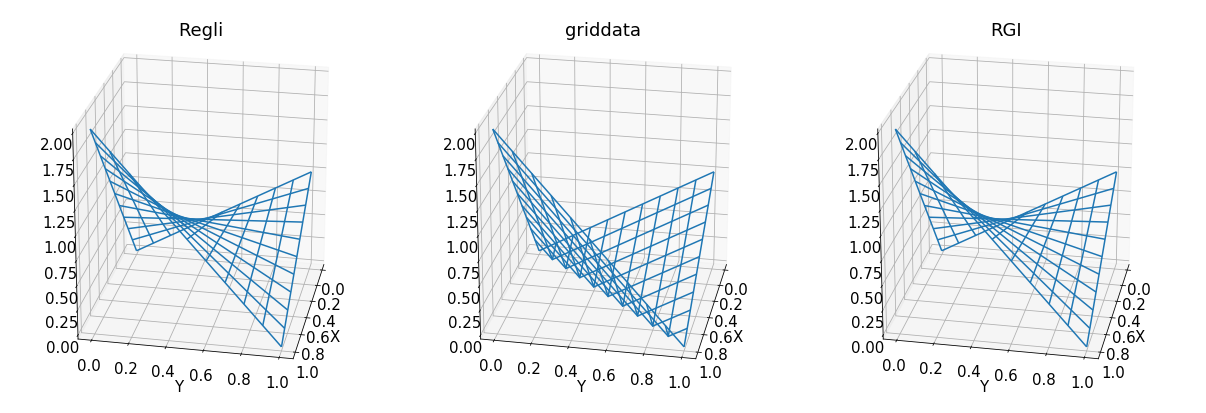

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(17, 6))

ax = fig.add_subplot(131, projection='3d')
ax.plot_wireframe(*r_interp.meshs, values_interp_2d, rstride=1, cstride=1)
ax.view_init(23, 11)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Regli")

ax = fig.add_subplot(132, projection='3d')
ax.plot_wireframe(*r_interp.meshs, values_interp_gd, rstride=1, cstride=1)
ax.view_init(23, 11)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("griddata")

ax = fig.add_subplot(133, projection='3d')
ax.plot_wireframe(*r_interp.meshs, values_interp_rgi, rstride=1, cstride=1)
ax.view_init(23, 11)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("RGI")

fig.tight_layout()

# Performance of `regli`

In [15]:
# test in 3D case
from regli import test
test()

regli.interp3 x 10000: 0.578197717666626 sec
regli.interpn x 10000: 2.98549747467041 sec
rgi x 10000: 6.010303020477295 sec
